In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier # vecinos más cercanos para clasificación
from sklearn.tree  import DecisionTreeClassifier # árboles de decisión para clasificación
from sklearn.metrics import accuracy_score # métrica de evaluación
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, auc
from sklearn.model_selection import learning_curve, validation_curve, train_test_split, StratifiedKFold, KFold
from sklearn.pipeline import Pipeline
import numpy as np
import sys
sys.path.insert(0, '../Code/')
from Plots import plt_learning_curve


In [85]:

df = pd.read_csv('../datasets/smokers.csv')


In [68]:
df.columns

Index(['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries', 'smoking'],
      dtype='object')

In [86]:
df = df[['triglyceride', 'Gtp', 'hemoglobin', 'serum creatinine', 'smoking', 'Cholesterol', 'Urine protein', 'age']]
X = df.drop(['smoking'], axis=1)
y = df['smoking']

Estarán de acuerdo que en terminos de Exactitud hemos conseguido el mejor resultado posible (Si logran mejores valores nos avisan!)

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X.loc[:,['triglyceride', 'Gtp', 'hemoglobin', 'serum creatinine']], y, test_size=0.3, stratify=y, random_state=42)
slc = StandardScaler(with_mean=True, with_std=True)
slc.fit(X_train) # entrenamos los valores quitandole la variable clase
X_train.loc[:,X_train.columns] = slc.transform(X_train)
X_test.loc[:,X_test.columns] = slc.transform(X_test)
model = KNeighborsClassifier(metric='euclidean', n_neighbors=69, weights='distance')
model.fit(X_train,y_train) # Entrenamos el clasificador
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.81      0.82      0.82      7400
           1       0.69      0.67      0.68      4296

    accuracy                           0.77     11696
   macro avg       0.75      0.74      0.75     11696
weighted avg       0.76      0.77      0.76     11696



Cambiamos KNN por otro clasificador y utilizamos mas columnas ¿Porque simplemente no demostramos la idea con KNN que es el clasificador que usamos con este dataset y con exactamente el dataset final con las columnas especificadas y los hiperparametros?

"Disclaimer" : KNN no es el mejor clasificador para mostrar la idea ya que es un clasificador extremadamente simple, requiere pocos datos y puntualmente nuestro modelo quedó con solo 4 columnas. Esto no invalida el concepto solo que las curvas de aprendizaje no presentarán el patrón buscado. Adicionalmente nuestro mejor modelo con su parametro weights='distance' hace que la serie de entrenamiento de nuestras curvas de aprendizaje quede muy ajustada al 1, además el modelo final generado al tener tan pocas columnas con muy pocos datos le es suficiente (Maldición de la dimensionalidad)

Mediante otra clasificador (Lo vemos en proximas clases) obtengo resultados similares 

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train,y_train) # Entrenamos el clasificador
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.77      0.78      7400
           1       0.62      0.63      0.63      4296

    accuracy                           0.72     11696
   macro avg       0.70      0.70      0.70     11696
weighted avg       0.72      0.72      0.72     11696



¿Con mas datos (Filas) sería mejor?

Veamos que dicen las curvas de aprendizaje.

In [92]:
#La verdad es que para hacerlo correctamente necesitamos un pipeline, pero no lo hemos visto en clase
#puntualmente aca no somos displicentes y hacemos lo correcto, mas adelante lo explicaremos
pl = Pipeline(steps=[('scaler', StandardScaler(with_mean=True, with_std=True)), 
                     ('knn', KNeighborsClassifier(metric='euclidean', n_neighbors=k))])
#, 
skf = KFold(n_splits=10, shuffle=True, random_state=42)
train_sizes, train_scores, test_scores = learning_curve(estimator=DecisionTreeClassifier(max_depth=5, random_state=42),
                                                        X=X,
                                                        y=y,
                                                        scoring="accuracy", #
                                                        train_sizes=np.linspace(0.01, 0.9, 10),
                                                        cv=skf,n_jobs=1)


Para este clasificador parece suficiente con aproximadamente 10000 registros

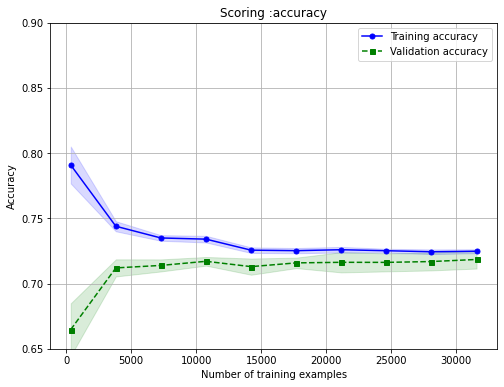

In [90]:
plt_learning_curve(train_sizes, train_scores, test_scores, "accuracy", ylims=[0.65, 0.8])

Si queremos buscar el mismo patrón con KNN nos alcanzara con muy, muy pocos datos.

In [108]:
k=20
#La verdad es que para hacerlo correctamente necesitamos un pipeline, pero no lo hemos visto en clase
#puntualmente aca no somos displicentes y hacemos lo correcto, mas adelante lo explicaremos
pl = Pipeline(steps=[('scaler', StandardScaler(with_mean=True, with_std=True)), 
                     ('knn', KNeighborsClassifier(metric='euclidean', n_neighbors=k))])
#, 
skf = KFold(n_splits=4, shuffle=True, random_state=42)
train_sizes, train_scores, test_scores = learning_curve(estimator=pl,
                                                        X=X,
                                                        y=y,
                                                        scoring="accuracy", #
                                                        train_sizes=np.linspace(0.001, 0.05, 10),
                                                        cv=skf,n_jobs=1)


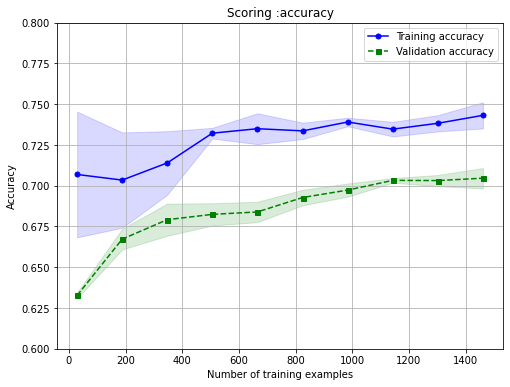

In [110]:
plt_learning_curve(train_sizes, train_scores, test_scores, "accuracy", ylims=[0.6, 0.8])